In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
df = pd.read_excel ('data.xlsx', col = ['Day','Country','Subregion','Users'])

In [53]:
df

,Day,Country,Subregion,Users
0,1,Brazil,a,161
1,1,Mexico,a,233
2,1,Colombia,a,36
3,1,Argentina,a,134
4,1,Peru,a,44
...,...,...,...,...
1685,168,Chile,b,88
1686,168,Guatemala,a,133
1687,168,Ecuado,a,127
1688,168,Costa Rica,a,323


In [54]:
current_day = 168
dff = (df[df['Day'].eq(current_day)]
       .sort_values(by='Users', ascending=True)
      .head(10))
dff


,Day,Country,Subregion,Users
1689,168,Uruguay,a,32
1685,168,Chile,b,88
1687,168,Ecuado,a,127
1686,168,Guatemala,a,133
1684,168,Peru,a,306
1688,168,Costa Rica,a,323
1683,168,Argentina,a,673
1682,168,Colombia,a,742
1680,168,Brazil,a,1390
1681,168,Mexico,a,1627


In [55]:
import seaborn as seabornInstance 
seabornInstance.set_style(style='whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

<BarContainer object of 10 artists>

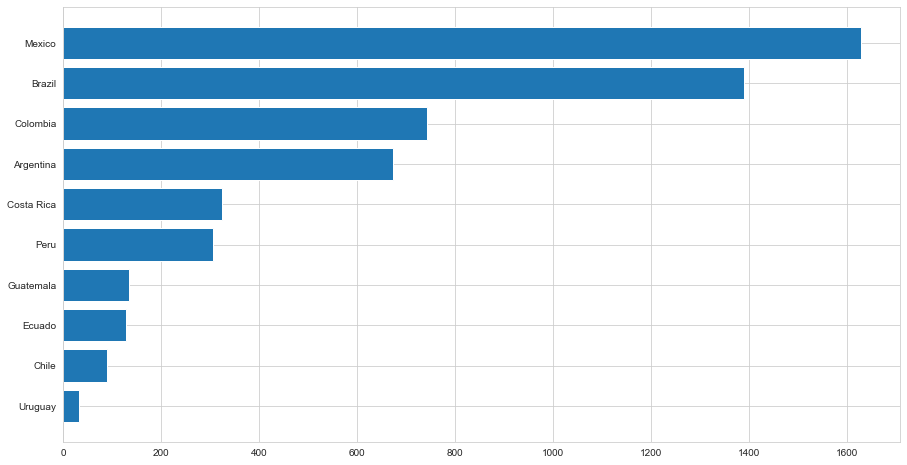

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Country'], dff['Users'])


In [57]:
colors = dict(zip(
    ['a', 'b'],
    [ '#aafbff', '#f7bb5f']
))
group_lk = df.set_index('Country')['Subregion'].to_dict()

Text(1, 0.4, '168')

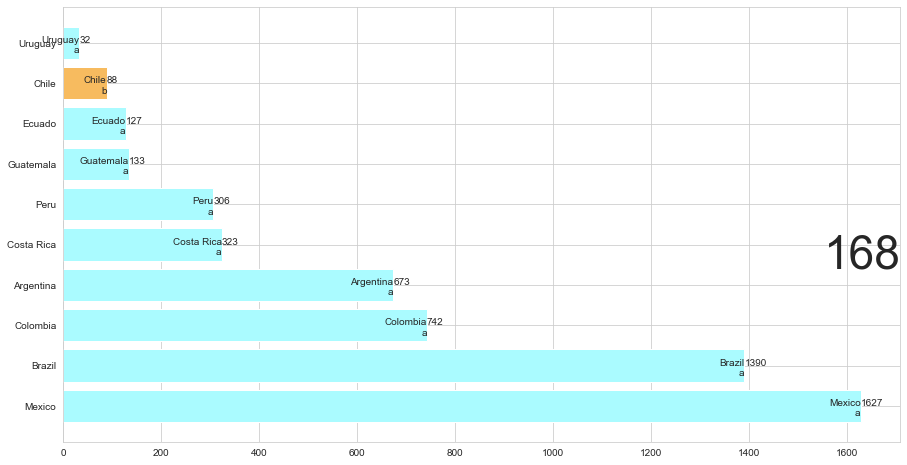

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Country'], dff['Users'], color=[colors[group_lk[x]] for x in dff['Country']])
# iterate over the values to plot labels and values
for i, (Users, Country) in enumerate(zip(dff['Users'], dff['Country'])):
    ax.text(Users, i,     Country,            ha='right')
    ax.text(Users, i-.25, group_lk[Country],  ha='right') 
    ax.text(Users, i,     Users,           ha='left')  
# Add year right middle portion of canvas
ax.text(1, 0.4, current_day, transform=ax.transAxes, size=46, ha='right')

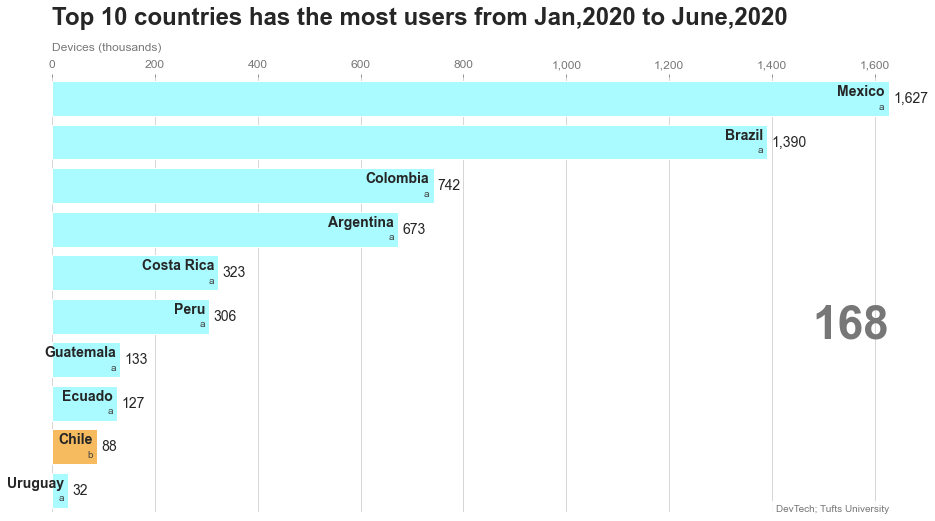

In [59]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(Day):
    dff = df[df['Day'].eq(Day)].sort_values(by='Users', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['Users'], color=[colors[group_lk[x]] for x in dff['Country']])
    dx = dff['Users'].max() / 200
    for i, (Users, Country) in enumerate(zip(dff['Users'], dff['Country'])):
        ax.text(Users-dx, i,     Country,           size=14, weight=600, ha='right', va='bottom')
        ax.text(Users-dx, i-.25, group_lk[Country], size=10, color='#444444', ha='right', va='baseline')
        ax.text(Users+dx, i,     f'{Users:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, Day, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Devices (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Top 10 countries has the most users from Jan,2020 to June,2020',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'DevTech; Tufts University', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(168)

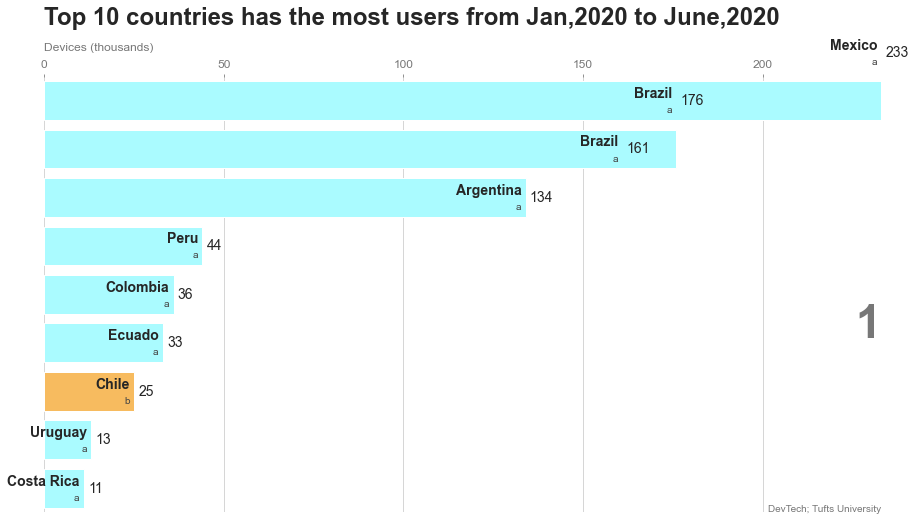

In [60]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 168), interval = 500)
HTML(animator.to_html5_video()) 
# or use animator.to_html5_video() or animator.save()